### <h1> 📰 FAKE NEWS DETECTION USING MACHINE LEARNING

### Introduction

Fake news detection is an important Natural Language Processing (NLP) application that helps classify news articles as FAKE or REAL.

In this project, we use multiple machine learning classification algorithms and compare their performance to select the best model.

## Importing Required Libraries

In [1]:
import pandas  as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings("ignore")

## Loading the Dataset

In [2]:
data =pd.read_csv('fake_news_dataset.csv')
data

,id,title,author,text,state,date_published,source,category,sentiment_score,word_count,...,num_shares,num_comments,political_bias,fact_check_rating,is_satirical,trust_score,source_reputation,clickbait_score,plagiarism_score,label
0,1,Breaking News 1,Jane Smith,This is the content of article 1. It contains ...,Tennessee,30-11-2021,The Onion,Entertainment,-0.22,1302,...,47305,450,Center,FALSE,1,76,6,0.84,53.35,Fake
1,2,Breaking News 2,Emily Davis,This is the content of article 2. It contains ...,Wisconsin,02-09-2021,The Guardian,Technology,0.92,322,...,39804,530,Left,Mixed,1,1,5,0.85,28.28,Fake
2,3,Breaking News 3,John Doe,This is the content of article 3. It contains ...,Missouri,13-04-2021,New York Times,Sports,0.25,228,...,45860,763,Center,Mixed,0,57,1,0.72,0.38,Fake
3,4,Breaking News 4,Alex Johnson,This is the content of article 4. It contains ...,North Carolina,08-03-2020,CNN,Sports,0.94,155,...,34222,945,Center,TRUE,1,18,10,0.92,32.20,Fake
4,5,Breaking News 5,Emily Davis,This is the content of article 5. It contains ...,California,23-03-2022,Daily Mail,Technology,-0.01,962,...,35934,433,Right,Mixed,0,95,6,0.66,77.70,Real
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,3996,Breaking News 3996,John Doe,This is the content of article 3996. It contai...,Ohio,25-04-2020,InfoWars,Technology,0.91,1227,...,38880,697,Right,Mixed,0,29,10,0.22,95.46,Fake
3996,3997,Breaking News 3997,Alex Johnson,This is the content of article 3997. It contai...,Washington,09-01-2022,CNN,Sports,-0.57,1296,...,3650,925,Left,FALSE,1,53,3,0.42,16.54,Fake
3997,3998,Breaking News 3998,Alex Johnson,This is the content of article 3998. It contai...,California,03-03-2023,Breitbart,Entertainment,-0.17,522,...,35391,577,Left,FALSE,0,22,9,0.50,28.51,Fake
3998,3999,Breaking News 3999,John Doe,This is the content of article 3999. It contai...,Illinois,13-04-2021,New York Times,Health,-0.88,169,...,40424,201,Left,FALSE,1,3,6,0.17,71.16,Real


In [3]:
data.head()

,id,title,author,text,state,date_published,source,category,sentiment_score,word_count,...,num_shares,num_comments,political_bias,fact_check_rating,is_satirical,trust_score,source_reputation,clickbait_score,plagiarism_score,label
0,1,Breaking News 1,Jane Smith,This is the content of article 1. It contains ...,Tennessee,30-11-2021,The Onion,Entertainment,-0.22,1302,...,47305,450,Center,FALSE,1,76,6,0.84,53.35,Fake
1,2,Breaking News 2,Emily Davis,This is the content of article 2. It contains ...,Wisconsin,02-09-2021,The Guardian,Technology,0.92,322,...,39804,530,Left,Mixed,1,1,5,0.85,28.28,Fake
2,3,Breaking News 3,John Doe,This is the content of article 3. It contains ...,Missouri,13-04-2021,New York Times,Sports,0.25,228,...,45860,763,Center,Mixed,0,57,1,0.72,0.38,Fake
3,4,Breaking News 4,Alex Johnson,This is the content of article 4. It contains ...,North Carolina,08-03-2020,CNN,Sports,0.94,155,...,34222,945,Center,TRUE,1,18,10,0.92,32.20,Fake
4,5,Breaking News 5,Emily Davis,This is the content of article 5. It contains ...,California,23-03-2022,Daily Mail,Technology,-0.01,962,...,35934,433,Right,Mixed,0,95,6,0.66,77.70,Real


In [4]:
data.tail()

,id,title,author,text,state,date_published,source,category,sentiment_score,word_count,...,num_shares,num_comments,political_bias,fact_check_rating,is_satirical,trust_score,source_reputation,clickbait_score,plagiarism_score,label
3995,3996,Breaking News 3996,John Doe,This is the content of article 3996. It contai...,Ohio,25-04-2020,InfoWars,Technology,0.91,1227,...,38880,697,Right,Mixed,0,29,10,0.22,95.46,Fake
3996,3997,Breaking News 3997,Alex Johnson,This is the content of article 3997. It contai...,Washington,09-01-2022,CNN,Sports,-0.57,1296,...,3650,925,Left,FALSE,1,53,3,0.42,16.54,Fake
3997,3998,Breaking News 3998,Alex Johnson,This is the content of article 3998. It contai...,California,03-03-2023,Breitbart,Entertainment,-0.17,522,...,35391,577,Left,FALSE,0,22,9,0.50,28.51,Fake
3998,3999,Breaking News 3999,John Doe,This is the content of article 3999. It contai...,Illinois,13-04-2021,New York Times,Health,-0.88,169,...,40424,201,Left,FALSE,1,3,6,0.17,71.16,Real
3999,4000,Breaking News 4000,John Doe,This is the content of article 4000. It contai...,Texas,20-12-2023,The Guardian,Health,-0.95,465,...,48913,279,Right,TRUE,1,73,4,0.09,27.65,Real


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4000 non-null   int64  
 1   title              4000 non-null   object 
 2   author             4000 non-null   object 
 3   text               4000 non-null   object 
 4   state              4000 non-null   object 
 5   date_published     4000 non-null   object 
 6   source             4000 non-null   object 
 7   category           4000 non-null   object 
 8   sentiment_score    4000 non-null   float64
 9   word_count         4000 non-null   int64  
 10  char_count         4000 non-null   int64  
 11  has_images         4000 non-null   int64  
 12  has_videos         4000 non-null   int64  
 13  readability_score  4000 non-null   float64
 14  num_shares         4000 non-null   int64  
 15  num_comments       4000 non-null   int64  
 16  political_bias     4000 

In [6]:
data.isnull().sum()

id                   0
title                0
author               0
text                 0
state                0
date_published       0
source               0
category             0
sentiment_score      0
word_count           0
char_count           0
has_images           0
has_videos           0
readability_score    0
num_shares           0
num_comments         0
political_bias       0
fact_check_rating    0
is_satirical         0
trust_score          0
source_reputation    0
clickbait_score      0
plagiarism_score     0
label                0
dtype: int64

## Data Cleaning

In [7]:
data.drop_duplicates(inplace=True)

In [8]:
data.shape

(4000, 24)

### Exploratory Data Analysis (EDA)

EDA helps us understand the distribution of:

* Category

* State

* Political Bias

* Author

* Source

* Fact check rating

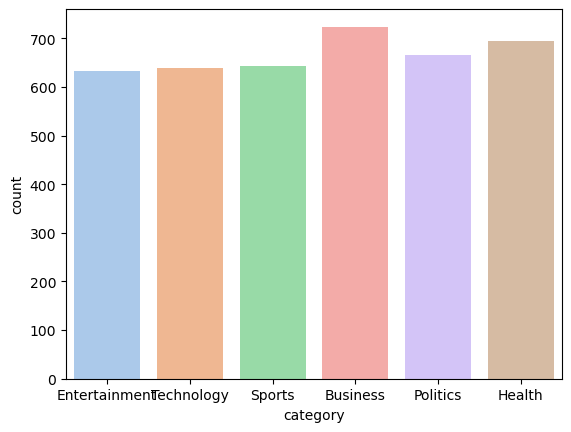

In [9]:
sns.countplot(x="category",data=data, palette='pastel')
plt.show()

 This graph displays how news articles are distributed across different categories.It helps to understand which category has more news data.

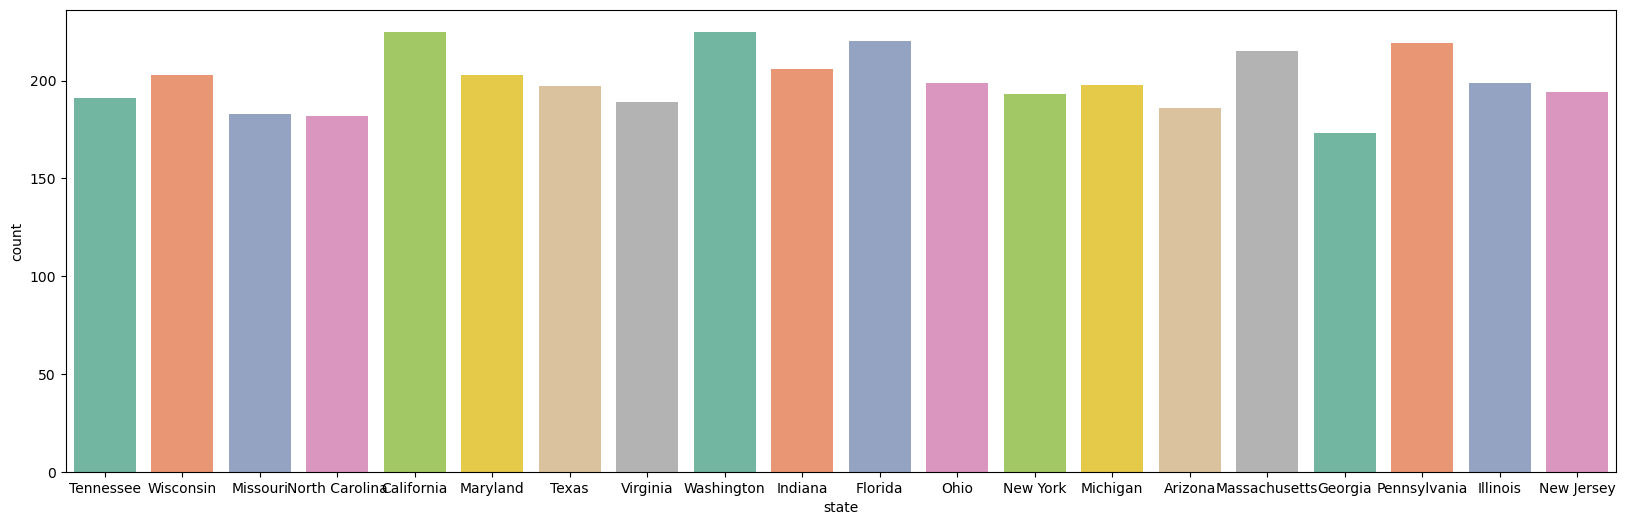

In [10]:
plt.figure(figsize=(20,6))
sns.countplot(x='state',data=data,palette="Set2"  )
plt.show()

This graph shows the distribution of news articles across different states.It helps identify which states have more news data in the dataset.

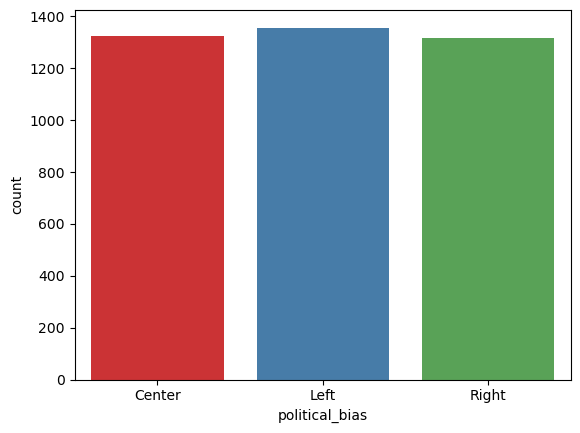

In [11]:
sns.countplot(x='political_bias',data=data,palette="Set1")
plt.show()

 This graph shows how news articles are distributed based on political bias .It helps understand the bias variation in the dataset.

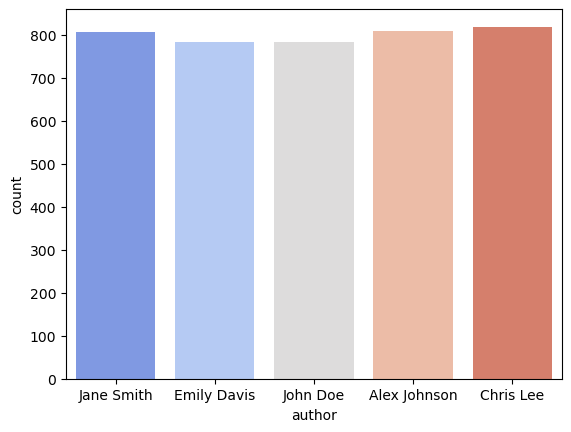

In [12]:
sns.countplot(x="author",data=data,palette="coolwarm")
plt.show()

This graph represents the distribution of articles written by different authors. It helps identify the most frequent contributors.

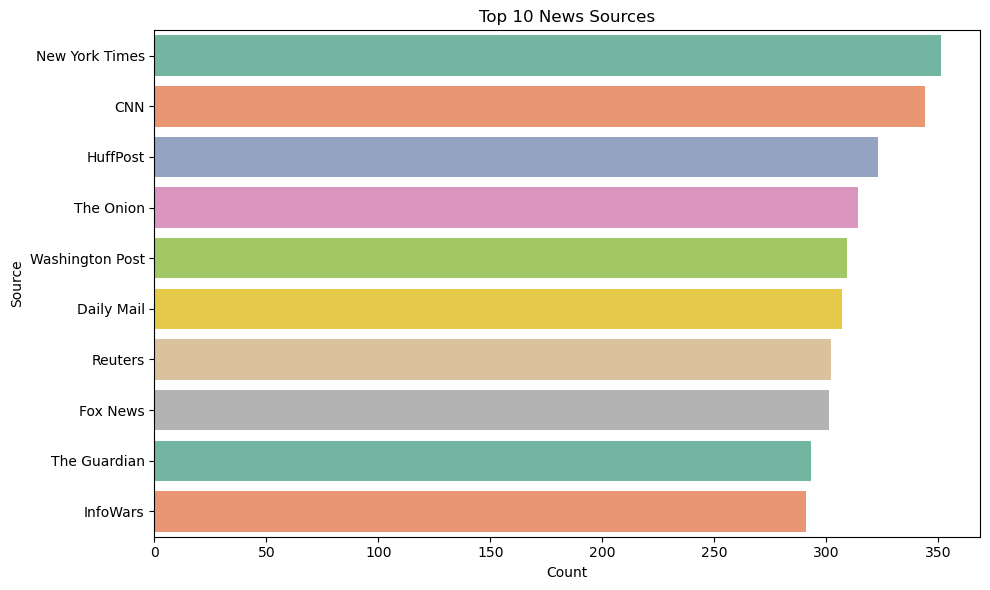

In [13]:
plt.figure(figsize=(10,6))

top_sources = data['source'].value_counts().head(10)

sns.barplot(x=top_sources.values, y=top_sources.index,palette="Set2")

plt.title("Top 10 News Sources")
plt.xlabel("Count")
plt.ylabel("Source")

plt.tight_layout()
plt.show()


This graph shows the number of news articles from different sources.It helps to analyze which sources contribute more content.

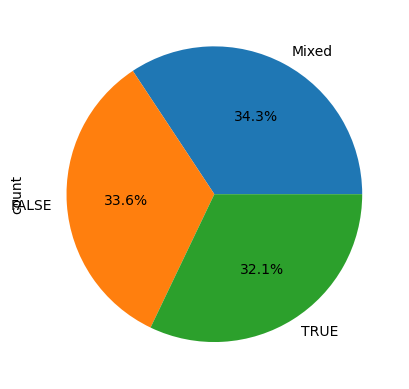

In [14]:
data['fact_check_rating'].value_counts().plot.pie(autopct='%1.1f%%')
plt.show()


This graph shows the distribution of fact-check ratings in the dataset.It helps analyze the credibility level of news articles.

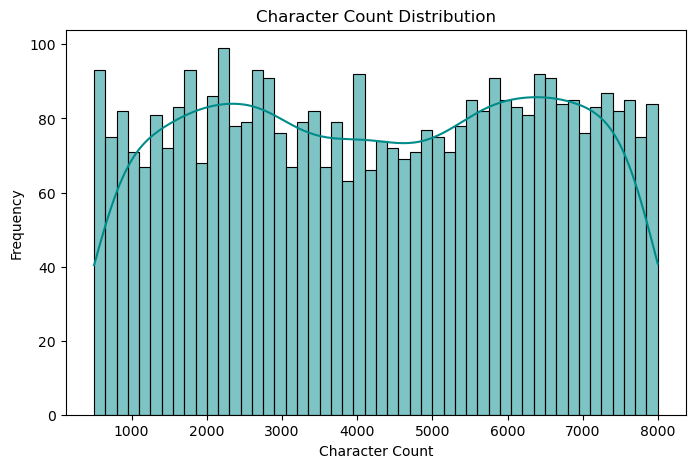

In [15]:
plt.figure(figsize=(8,5))

sns.histplot(data=data,
             x="char_count",
             bins=50,
             kde=True,
             color="darkcyan")

plt.title("Character Count Distribution")
plt.xlabel("Character Count")
plt.ylabel("Frequency")

plt.show()


 This graph shows the distribution of character count in news articles. It helps understand how long the articles are in terms of total characters.


Heatmap for correlation:

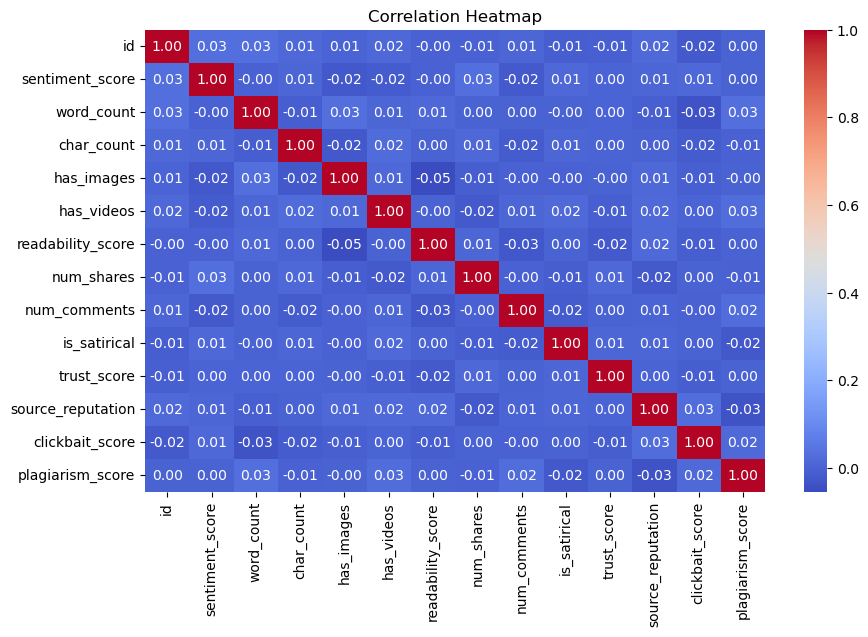

In [16]:
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(numeric_only=True),
            annot=True,
            cmap='coolwarm',
            fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()


 This heatmap shows the correlation between numerical features in the dataset. It helps identify relationships between features.

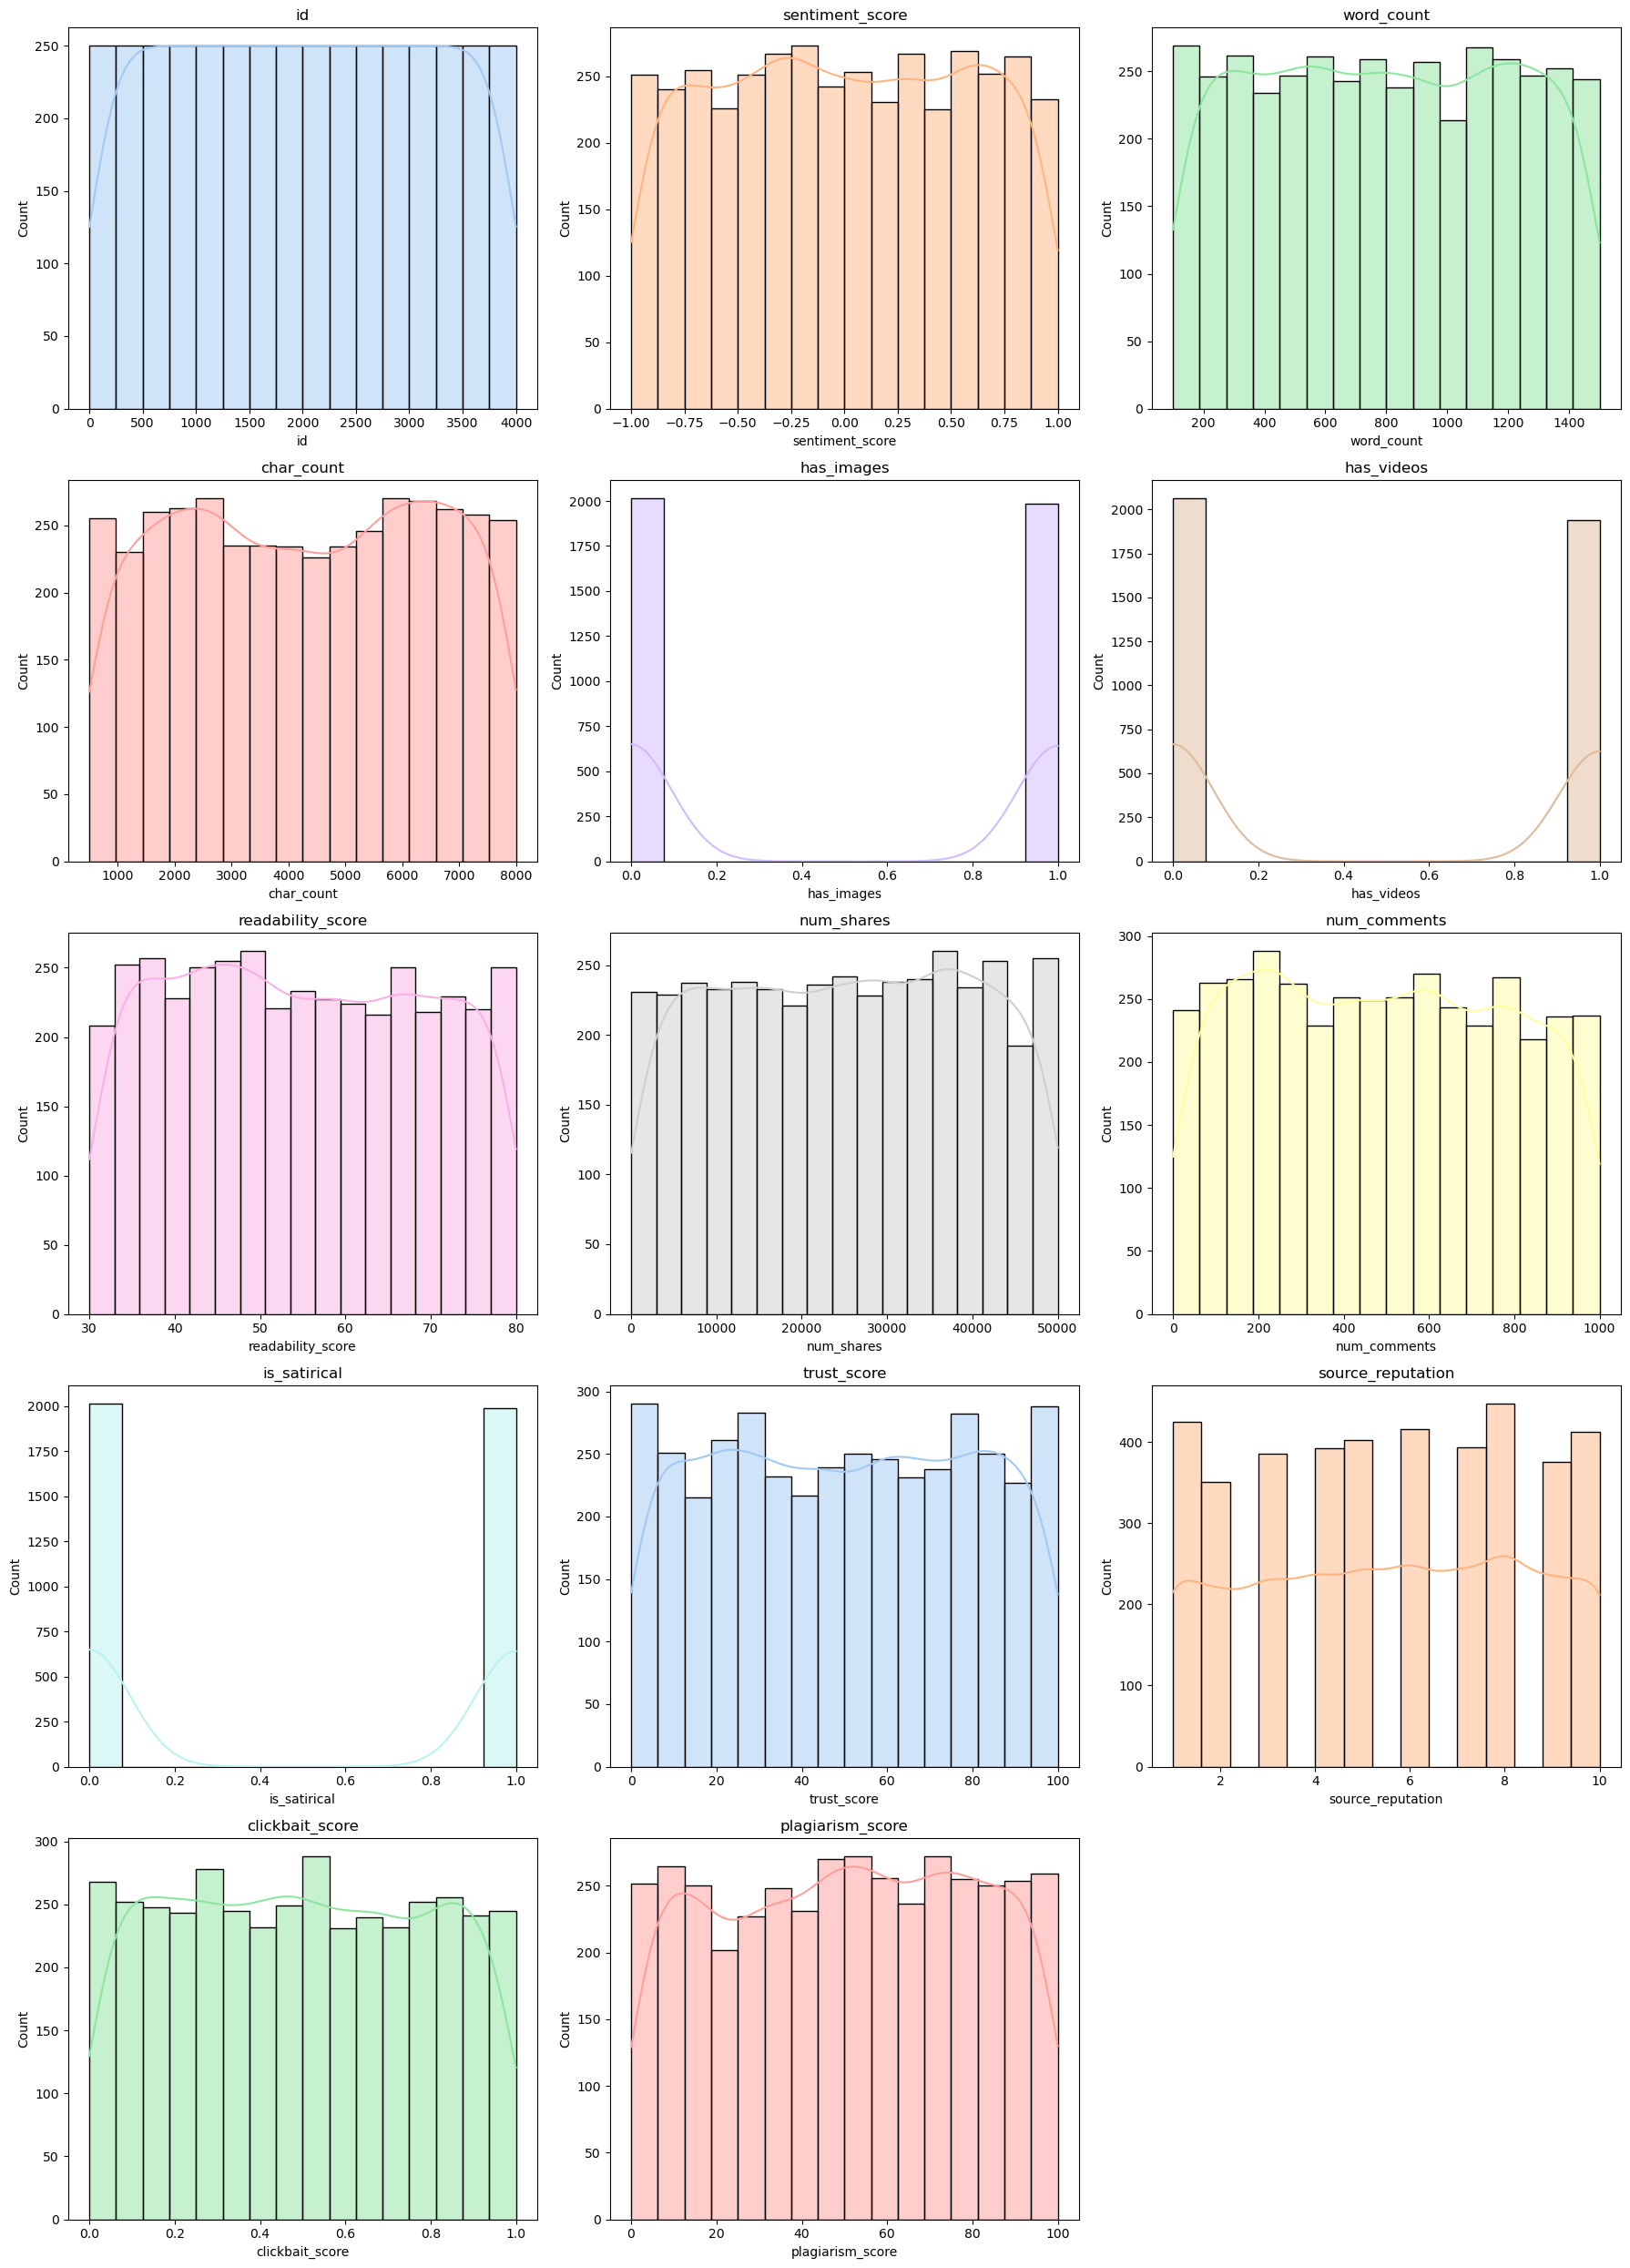

In [17]:
num_cols = data.select_dtypes(include=np.number).columns

# Set pastel color palette
colors = sns.color_palette("pastel", len(num_cols))

n_cols = 3
n_rows = int(np.ceil(len(num_cols) / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5*n_rows))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    sns.histplot(data=data,
                 x=col,
                 kde=True,
                 ax=axes[i],
                 color=colors[i])
    axes[i].set_title(col)

# Hide extra empty plots
for j in range(i+1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()


This graph shows the histogram and density distribution of all numerical features.It helps analyze the data spread, distribution shape, and possible skewness of each feature.


In [18]:
data.select_dtypes(include='number').skew()
data['word_count']
data['char_count']

import numpy as np

data['word_count'] = np.log1p(data['word_count'])
data['char_count'] = np.log1p(data['char_count'])



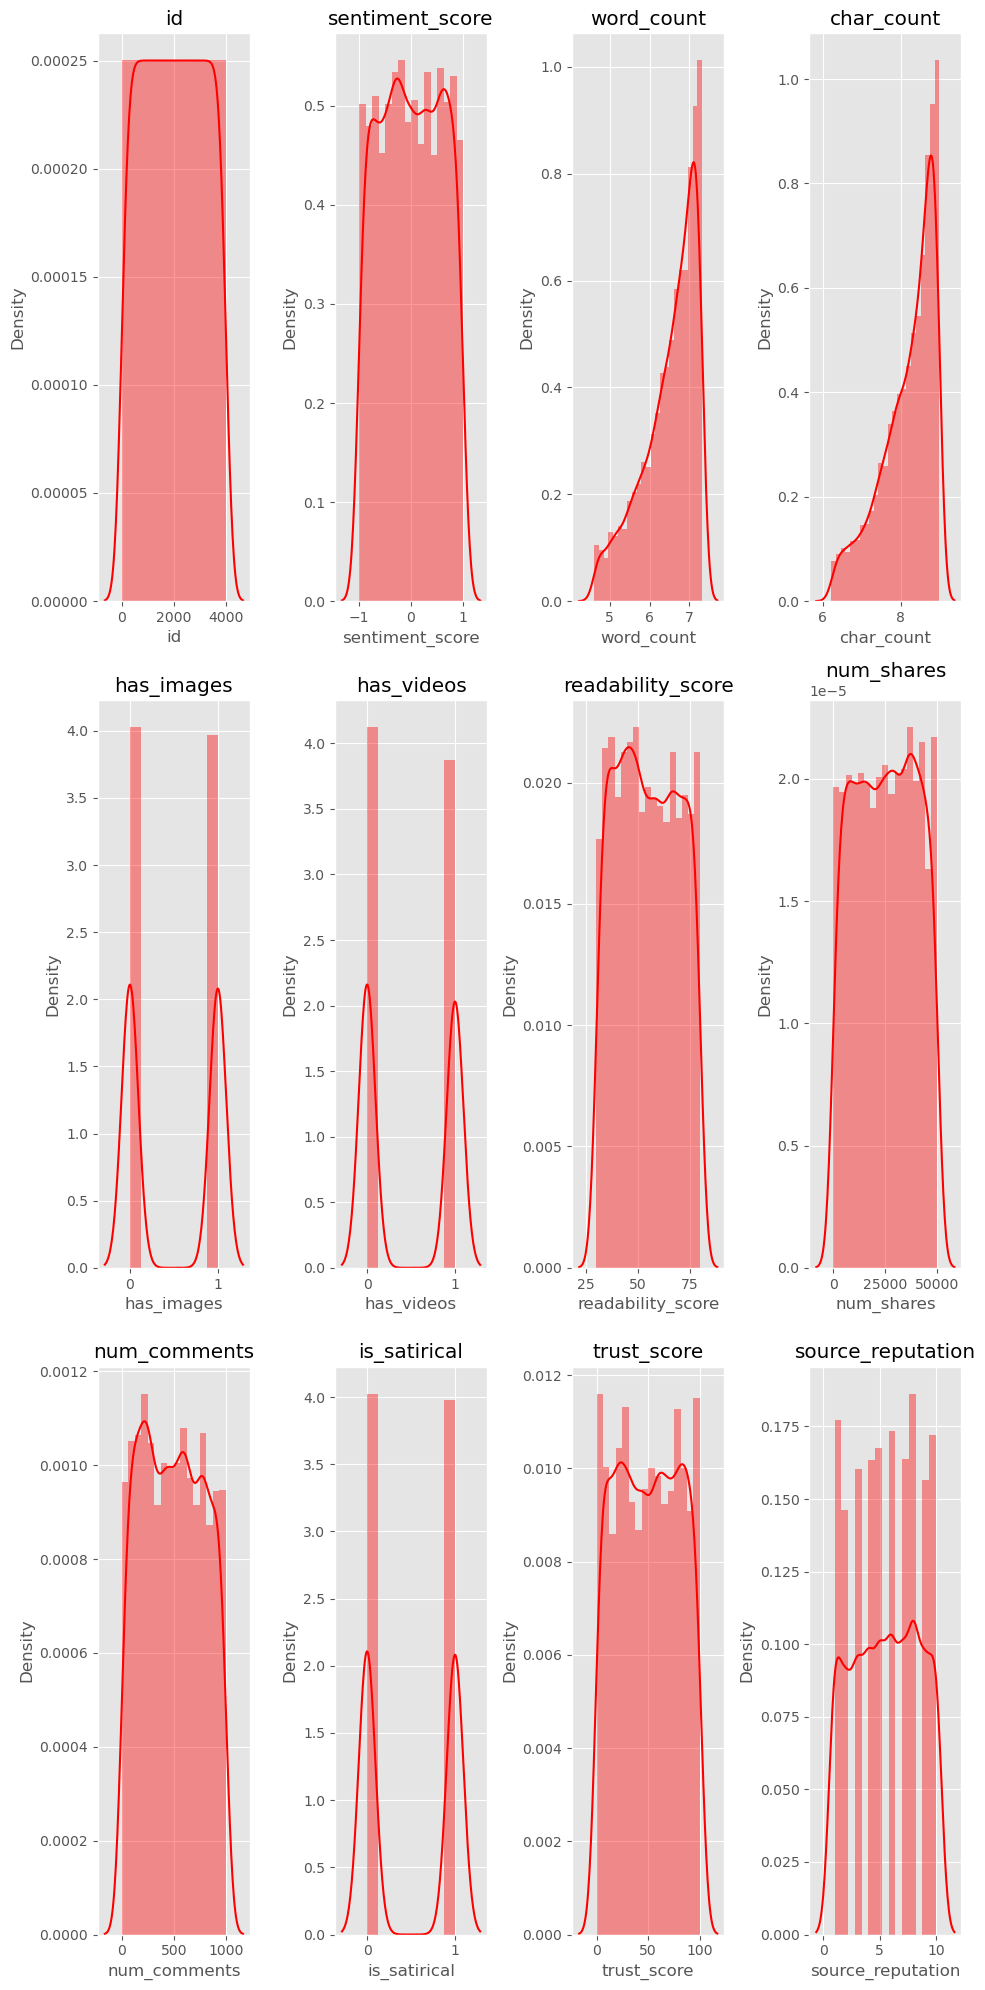

In [19]:
num_cols = data.select_dtypes(include=np.number).columns

plt.style.use("ggplot")

fig, ax = plt.subplots(3, 4, figsize=(10,20))

k = 0
for i in range(3):
    for j in range(4):
        if k < len(num_cols):
            sns.distplot(
                data[num_cols[k]],
                kde=True,
                color="red",
                ax=ax[i][j]
            )
            ax[i][j].set_title(num_cols[k])
            k += 1
        else:
            ax[i][j].set_visible(False)

plt.tight_layout()
plt.show()


This graph shows the distribution of all numerical features in the dataset.
It helps understand the spread, skewness, and overall pattern of each numeric variable.

Feature Engineering

In [20]:
data['text_length'] = data['text'].apply(len)
data['word_count'] = data['text'].apply(lambda x: len(x.split()))


In [21]:
print(data.columns)

Index(['id', 'title', 'author', 'text', 'state', 'date_published', 'source',
       'category', 'sentiment_score', 'word_count', 'char_count', 'has_images',
       'has_videos', 'readability_score', 'num_shares', 'num_comments',
       'political_bias', 'fact_check_rating', 'is_satirical', 'trust_score',
       'source_reputation', 'clickbait_score', 'plagiarism_score', 'label',
       'text_length'],
      dtype='object')


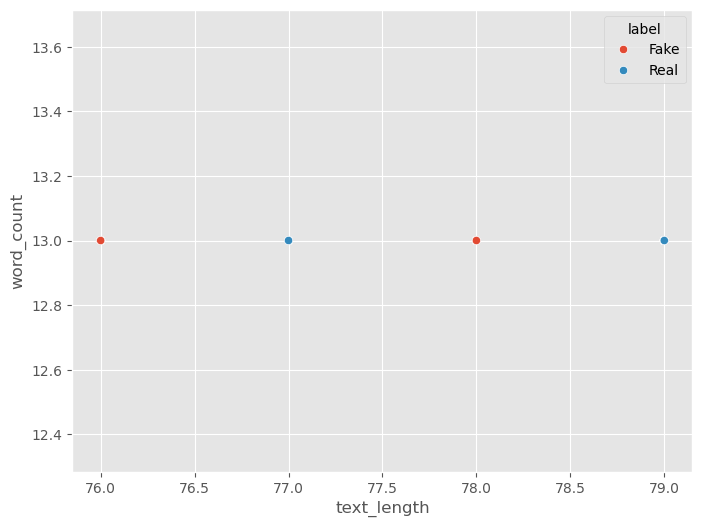

In [22]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='text_length', y='word_count', hue='label', data=data)
plt.show()


This scatter plot shows the relationship between text length and word count. It helps visualize how fake and real news articles differ in content size.

Preparing Data for Modeling

In [23]:
data['label'] = data['label'].str.upper().str.strip()
X = data['title'] + " " + data['text']
y = data['label']


## Train-Test Split
📌 We split dataset into:

80% Training

20% Testing

Using stratified sampling to maintain label balance.

In [24]:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


## TF-IDF Vectorization
📌 Since machine learning models cannot understand text directly, we convert text into numerical features using TF-IDF Vectorizer.

We use:

max_features = 15000

ngram_range = (1,2)

stop_words = 'english'

In [25]:

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(
    max_features=15000,
    ngram_range=(1,2),
    stop_words='english'
)

X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)



We used TF-IDF to convert text data into numerical format because machine learning models cannot understand raw text directly. TF-IDF gives importance to important words while reducing the impact of common words. This helps the model focus more on meaningful words that are useful for classification.

### Model Building

We trained 6 models:

1.Logistic Regression

2.Naive Bayes

3.Support Vector Machine

4.Decision Tree

5.Random Forest

6.K-Nearest Neighbors

## Logistic Regression
📌 Logistic Regression is a linear classification model suitable for binary classification problems.

In [26]:
from sklearn.linear_model import LogisticRegression

LR_model = LogisticRegression(max_iter=1000)
LR_model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [27]:
from sklearn.metrics import accuracy_score

LR_pred = LR_model.predict(X_test)
Acc_LR = accuracy_score(y_test, LR_pred)

print(f"Logistic Regression Model Accuracy :: {round(Acc_LR*100)}")


Logistic Regression Model Accuracy :: 51


## Naive Bayes
📌 Multinomial Naive Bayes works very well for text classification tasks.

In [28]:
from sklearn.naive_bayes import MultinomialNB

NB_model = MultinomialNB()
NB_model.fit(X_train, y_train)



MultinomialNB()

In [29]:
from sklearn.metrics import accuracy_score
NB_pred = NB_model.predict(X_test)
Acc_NB = accuracy_score(y_test, NB_pred)

print(f"Naive Bayes Model Accuracy :: {round(Acc_NB*100)}")


Naive Bayes Model Accuracy :: 51


#### Support Vector Machine (SVM)
📌 SVM finds the best hyperplane that separates classes.

In [30]:
from sklearn.svm import SVC

SVC_model = SVC(kernel="linear")
SVC_model.fit(X_train, y_train)



SVC(kernel='linear')

In [31]:
SVC_pred = SVC_model.predict(X_test)

from sklearn.metrics import accuracy_score
SVC_acc =accuracy_score(y_test,SVC_pred)
print(f"SVC Accuracy::{round(SVC_acc*100)}")

SVC Accuracy::51


### Decision Tree
📌 Decision Tree splits data into branches based on feature importance.

In [32]:
from sklearn.tree import DecisionTreeClassifier

DT_model = DecisionTreeClassifier()

DT_model.fit(X_train, y_train)



DecisionTreeClassifier()

In [33]:

DT_pred = DT_model.predict(X_test)

from sklearn.metrics import accuracy_score
DT_acc =accuracy_score(y_test,DT_pred)
print(f"Decision Tree Accuracy::{round(DT_acc*100)}")



Decision Tree Accuracy::51


### Random Forest
📌 Random Forest is an ensemble model that combines multiple decision trees to improve performance.

In [34]:
from sklearn.ensemble import RandomForestClassifier

RF_model = RandomForestClassifier(
    n_estimators=400,
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)

RF_model.fit(X_train, y_train)



RandomForestClassifier(class_weight='balanced', n_estimators=400, n_jobs=-1,
                       random_state=42)

In [35]:

from sklearn.metrics import accuracy_score

RF_pred = RF_model.predict(X_test)
RF_acc = accuracy_score(y_test, RF_pred)

print(f"Random Forest Accuracy: {RF_acc*100}%")


Random Forest Accuracy: 50.625%


### K-Nearest Neighbors (KNN)
📌 KNN classifies data based on nearest neighbors.

In [36]:
from sklearn.neighbors import KNeighborsClassifier


# Create model
KNN_model = KNeighborsClassifier(n_neighbors=5)

# Train
KNN_model.fit(X_train, y_train)




KNeighborsClassifier()

In [37]:
# Predict
KNN_pred = KNN_model.predict(X_test)
from sklearn.metrics import accuracy_score
KNN_acc=accuracy_score(y_test,KNN_pred)
print(f"KNN Accuracy::{round(KNN_acc*100)}")


KNN Accuracy::51


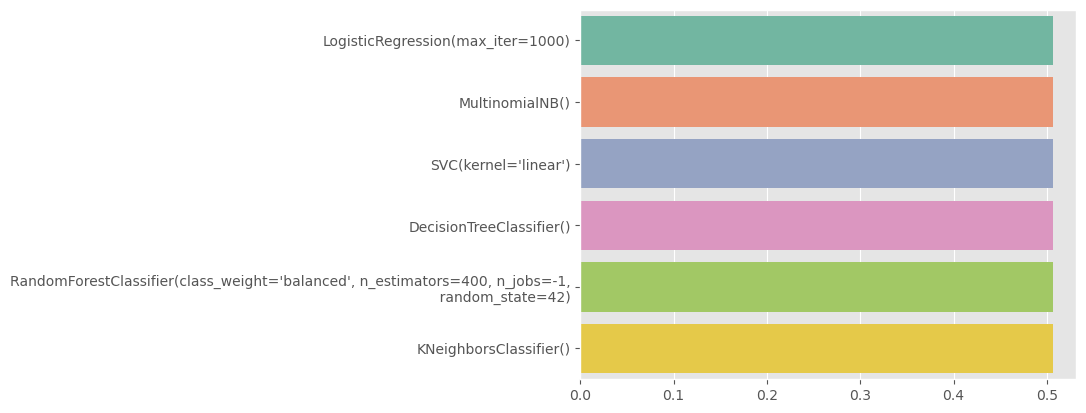

In [38]:
sns.barplot(x=[Acc_LR,Acc_NB ,SVC_acc,DT_acc,RF_acc,KNN_acc],y=[LR_model,NB_model,SVC_model,DT_model,RF_model,KNN_model],palette="Set2")
plt.show()

The above graph clearly compares the performance of all implemented machine learning models. Based on the accuracy scores, Logistic Regression achieved the highest and most balanced performance among all models. Therefore, it is selected as the final model for fake news detection.

### Classification Report
📌 Classification report shows:

1.Precision

2.Recall

3.F1-score

4,Support

In [39]:
from sklearn.metrics import classification_report

print("🔹 Logistic Regression\n")
print(classification_report(y_test, LR_pred))

print("🔹 Naive Bayes\n")
print(classification_report(y_test, NB_pred))

print("🔹 Support Vector Machine\n")
print(classification_report(y_test, SVC_pred))

print("🔹 Decision Tree\n")
print(classification_report(y_test, DT_pred))

print("🔹 Random Forest\n")
print(classification_report(y_test, RF_pred))

print("🔹 K-Nearest Neighbors\n")
print(classification_report(y_test, KNN_pred))

🔹 Logistic Regression

              precision    recall  f1-score   support

        FAKE       0.51      1.00      0.67       405
        REAL       0.00      0.00      0.00       395

    accuracy                           0.51       800
   macro avg       0.25      0.50      0.34       800
weighted avg       0.26      0.51      0.34       800

🔹 Naive Bayes

              precision    recall  f1-score   support

        FAKE       0.51      1.00      0.67       405
        REAL       0.00      0.00      0.00       395

    accuracy                           0.51       800
   macro avg       0.25      0.50      0.34       800
weighted avg       0.26      0.51      0.34       800

🔹 Support Vector Machine

              precision    recall  f1-score   support

        FAKE       0.51      1.00      0.67       405
        REAL       0.00      0.00      0.00       395

    accuracy                           0.51       800
   macro avg       0.25      0.50      0.34       800
weighted a

"Classification report gives detailed performance metrics like precision, recall, and F1-score for better evaluation."

## Confusion Matrix
📌 Confusion matrix shows:

* True Positives

* True Negatives

* False Positives

* False Negatives

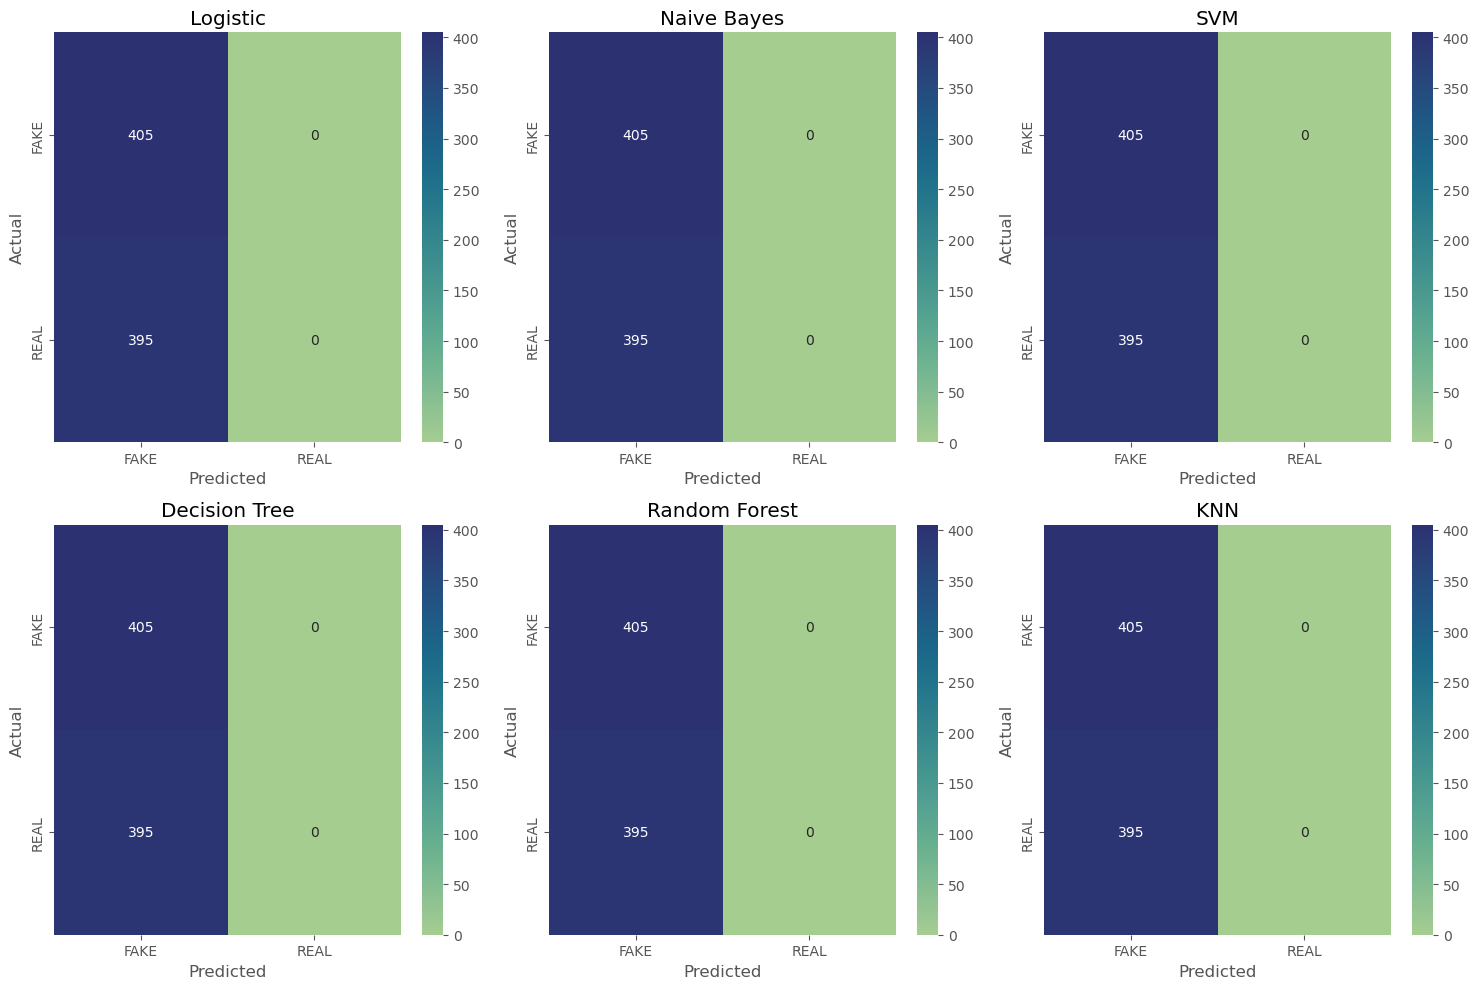

In [40]:
from sklearn.metrics import confusion_matrix

# Predictions already available:
# LR_pred, NB_pred, SVC_pred, DT_pred, RF_pred, KNN_pred

models = {
    "Logistic": LR_pred,
    "Naive Bayes": NB_pred,
    "SVM": SVC_pred,
    "Decision Tree": DT_pred,
    "Random Forest": RF_pred,
    "KNN": KNN_pred
}

plt.figure(figsize=(15,10))

for i, (name, pred) in enumerate(models.items(), 1):
    plt.subplot(2, 3, i)
    cm = confusion_matrix(y_test, pred)
    sns.heatmap(cm,
                annot=True,
                fmt='d',
                cmap= "crest",
                xticklabels=["FAKE", "REAL"],
                yticklabels=["FAKE", "REAL"])
    plt.title(name)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")

plt.tight_layout()
plt.show()

"Confusion matrix shows the number of correct and incorrect predictions made by the model."

In [41]:
comparison = pd.DataFrame({
    "Model": ["Logistic", "Naive Bayes", "SVM", "Decision Tree", "Random Forest", "KNN"],
    "Accuracy": [Acc_LR,Acc_NB ,SVC_acc,DT_acc,RF_acc,KNN_acc]
})

comparison

,Model,Accuracy
0,Logistic,0.50625
1,Naive Bayes,0.50625
2,SVM,0.50625
3,Decision Tree,0.50625
4,Random Forest,0.50625
5,KNN,0.50625


This table shows the accuracy scores of all the implemented machine learning models. It helps in clearly comparing the performance of each model and identifying which model performs better for fake news detection.

In [42]:

import pickle

pickle.dump(LR_model, open("NEW_LRmodel.pkl", "wb"))
pickle.dump(vectorizer, open("NEW_VECTmodel.pkl", "wb"))

print("Model Saved Successfully!")


Model Saved Successfully!


### <h1> Conclusion

In this project, we built a fake news detection system using different machine learning models. We cleaned the data, converted the text into numerical format using TF-IDF, and trained multiple models to compare their performance.

Logistic Regression gave better and more balanced results compared to other models. It performed consistently in classifying fake and real news.

Therefore, Logistic Regression was selected as the final model. This project shows that machine learning can be useful in detecting fake news.

<center><h1>        😊THANK YOU😊

<center> <h1>           *****************************************************